In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import joblib
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
final_model = joblib.load('final_model.pkl')
log_df = pd.read_csv('log_df.csv')



In [4]:
labels=final_model.predict(log_df)


In [46]:
#tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

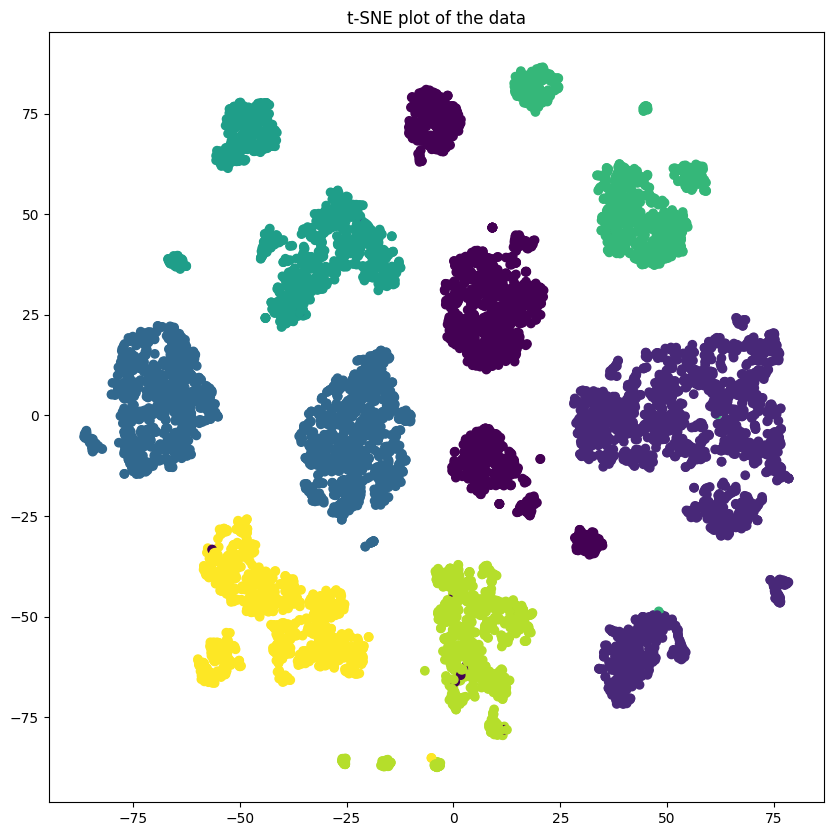

In [53]:
#plot the tsne hue bye the label

tsne_obj= tsne.fit_transform(log_df)
X1_tsne = tsne_obj[:,0]
X2_tsne = tsne_obj[:,1]
plt.figure(figsize=(10,10))
plt.scatter(X1_tsne, X2_tsne, c=labels, cmap=plt.cm.get_cmap('viridis', 10))
plt.title('t-SNE plot of the data')
plt.show()

In [63]:
#plot the tsne in 3d using plotly
import plotly.express as px
tsne=TSNE(n_components=3, random_state=0)
tsne_obj=tsne.fit_transform(log_df)
fig = px.scatter_3d(x=tsne_obj[:,0], y=tsne_obj[:,1], z=tsne_obj[:,2], color=labels)
fig.show()
print('done')
px.scatter_3d(x=tsne_obj[:,0], y=tsne_obj[:,1], z=tsne_obj[:,2], color=labels)
plt.show()



done


In [64]:
original_df = pd.read_csv('CC GENERAL.csv')

In [65]:
#knn impuation for MINIMUM_PAYMENTS 
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
original_df['MINIMUM_PAYMENTS'] = imputer.fit_transform(original_df[['MINIMUM_PAYMENTS']])

In [66]:
original_df.dropna(inplace=True)
original_df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [67]:
cluster_1 = log_df[labels == 0]
cluster_2 = log_df[labels == 1]
cluster_3 = log_df[labels == 2]
cluster_4 = log_df[labels == 3]
cluster_5 = log_df[labels == 4]
cluster_6 = log_df[labels == 5]
cluster_7 = log_df[labels == 6]

In [68]:
set(labels)

{0, 1, 2, 3, 4, 5, 6}

## Cluster 1

In [70]:
cluster_1_original = original_df[labels == 0]
cluster_1_original.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1354.0,929.422493,1417.257636,0.000000,68.333236,399.617067,1201.954262,13763.47358
BALANCE_FREQUENCY,1354.0,0.808435,0.284290,0.000000,0.636364,1.000000,1.000000,1.00000
PURCHASES,1354.0,1263.810428,2291.989844,0.010000,211.270000,634.905000,1370.142500,49039.57000
ONEOFF_PURCHASES,1354.0,1059.789498,1915.142250,0.010000,169.380000,511.210000,1186.900000,40761.25000
INSTALLMENTS_PURCHASES,1354.0,204.090303,706.964700,0.000000,0.000000,0.000000,0.000000,13184.43000
CASH_ADVANCE,1354.0,491.649406,2020.459515,0.000000,0.000000,0.000000,0.000000,29282.10915
PURCHASES_FREQUENCY,1354.0,0.450243,0.352909,0.083333,0.100000,0.333333,0.833333,1.00000
ONEOFF_PURCHASES_FREQUENCY,1354.0,0.373546,0.313673,0.083333,0.083333,0.250000,0.583333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,1354.0,0.140407,0.308368,0.000000,0.000000,0.000000,0.000000,1.00000
CASH_ADVANCE_FREQUENCY,1354.0,0.055864,0.146008,0.000000,0.000000,0.000000,0.000000,1.00000


- they frequently buy as the purchase frequency average is high over 0.8333
- they frequently buy and use the application not only once as ONEOFF_PURCHASES_FREQUENCY average is 0.1663

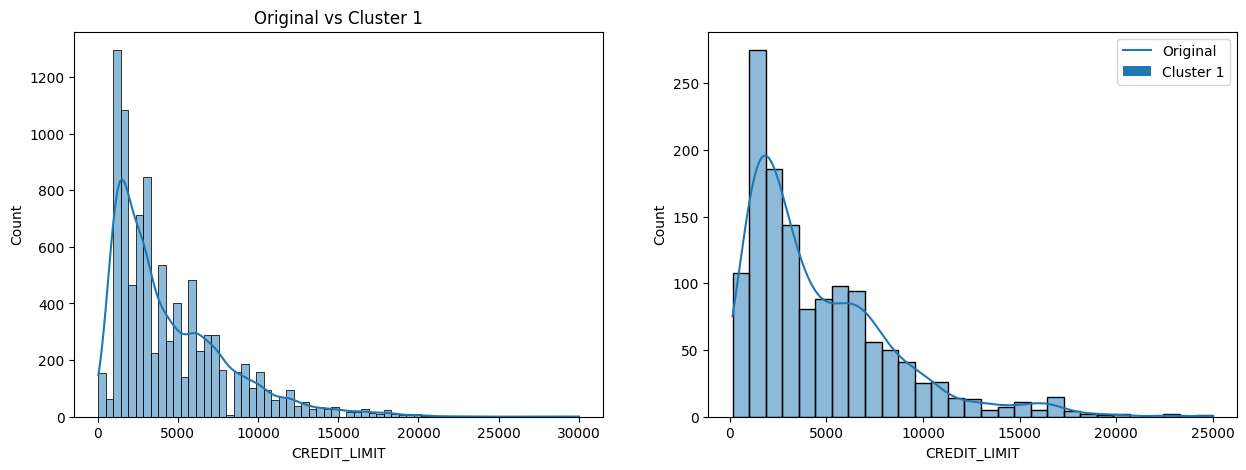

In [87]:
#compare the original data with the cluster data
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(original_df['CREDIT_LIMIT'],kde=True, ax=ax[0])
sns.histplot(cluster_1_original['CREDIT_LIMIT'],kde=True, ax=ax[1])
ax[0].set_title('Original vs Cluster 1')


The credit limit is not distinct from other clusters

In [114]:
original_df.shape

(8949, 18)

In [118]:
original_df['Labels'] = labels

<Axes: xlabel='Labels', ylabel='Count'>

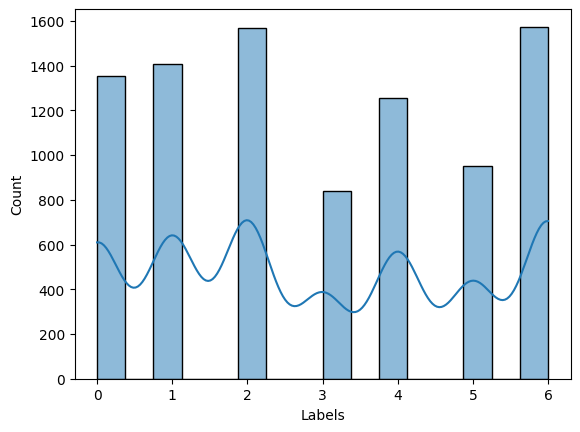

In [123]:
sns.histplot(original_df['Labels'], kde=True)

## cluster 4 is the least frequent cluster so let's analyze it

In [125]:
original_df[original_df['Labels']==3].describe().T  

,count,mean,std,min,25%,50%,75%,max
BALANCE,838.0,461.237169,883.565940,3.786310,94.002214,213.022828,451.780552,13479.28821
BALANCE_FREQUENCY,838.0,0.917770,0.157906,0.166667,0.909091,1.000000,1.000000,1.00000
PURCHASES,838.0,2911.949344,4348.593315,69.000000,862.417500,1767.680000,3136.235000,41050.40000
ONEOFF_PURCHASES,838.0,1818.630322,3573.095748,0.010000,261.480000,867.690000,2006.742500,40624.06000
INSTALLMENTS_PURCHASES,838.0,1093.319021,1501.210280,1.950000,296.482500,641.850000,1287.522500,15497.19000
CASH_ADVANCE,838.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
PURCHASES_FREQUENCY,838.0,0.852833,0.209147,0.083333,0.750000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,838.0,0.507738,0.357297,0.083333,0.166667,0.416667,0.916667,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,838.0,0.673277,0.301564,0.083333,0.416667,0.750000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,838.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


## this segment never  pay cash on advance 
|CASH_ADVANCE_FREQUENCY	|838.0|	0.000000|	0.000000|	0.000000|	0.000000|	0.000000|	0.000000|	0.00000|
|-----------------------|-----|---------|-----------|-----------|-----------|-----------|-----------|----------|
|CASH_ADVANCE_TRX	    |838.0| 0.000000|	0.000000|   0.000000|   0.000000|	0.000000|	0.000000|	0.00000|




# Cluster 7

In [127]:
original_df[original_df['Labels']==6].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1574.0,2451.157398,2175.386444,0.000000,1054.585320,1687.632512,3139.723376,14581.45914
BALANCE_FREQUENCY,1574.0,0.925047,0.183542,0.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,1574.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
ONEOFF_PURCHASES,1574.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
INSTALLMENTS_PURCHASES,1574.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
CASH_ADVANCE,1574.0,1804.307959,2180.691415,18.117967,313.721532,1127.209354,2505.630823,23130.82106
PURCHASES_FREQUENCY,1574.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
ONEOFF_PURCHASES_FREQUENCY,1574.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
PURCHASES_INSTALLMENTS_FREQUENCY,1574.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
CASH_ADVANCE_FREQUENCY,1574.0,0.280822,0.204767,0.083333,0.100000,0.250000,0.372159,1.50000


This segment has zerp of purchase frequency and oneoff purchase frequency so they never used the application to buy any thing

## Cluster 3

In [128]:
original_df[original_df['Labels']==2].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1567.0,2590.641449,2579.039777,0.000000,887.890359,1717.662673,3473.135119,19043.13856
BALANCE_FREQUENCY,1567.0,0.957013,0.141967,0.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,1567.0,1839.357007,2202.329469,0.000000,460.415000,1168.750000,2338.595000,25378.36000
ONEOFF_PURCHASES,1567.0,1029.517690,1564.051355,0.000000,36.575000,524.800000,1375.750000,20646.07000
INSTALLMENTS_PURCHASES,1567.0,810.116752,1118.880188,6.330000,191.240000,460.280000,1032.210000,14686.10000
CASH_ADVANCE,1567.0,865.324778,1774.190797,0.000000,0.000000,0.000000,969.201333,20712.67008
PURCHASES_FREQUENCY,1567.0,0.766479,0.273050,0.000000,0.583333,0.916667,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,1567.0,0.348507,0.327343,0.000000,0.083333,0.250000,0.583333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,1567.0,0.636924,0.317408,0.083333,0.333333,0.666667,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,1567.0,0.121798,0.200006,0.000000,0.000000,0.000000,0.166667,1.00000


In this cluster all of them has tenure of 2 and they are purchasing frequently and using the application frequently
and they usally use it to buy multiple times not only one item as the one frequency average is 0.25

## Cluster 5

In [129]:
original_df[original_df['Labels']==4].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1257.0,2440.958320,2313.070086,0.000000,874.203747,1655.668019,3332.460521,16115.59640
BALANCE_FREQUENCY,1257.0,0.940000,0.151441,0.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,1257.0,731.857884,1285.830128,0.010000,179.900000,441.180000,907.990000,22101.78000
ONEOFF_PURCHASES,1257.0,580.821846,1243.201370,0.010000,117.570000,284.110000,646.070000,22101.78000
INSTALLMENTS_PURCHASES,1257.0,151.308027,371.987352,0.000000,0.000000,0.000000,145.000000,4460.78000
CASH_ADVANCE,1257.0,1923.473673,2619.661021,14.222216,372.192943,1093.862642,2555.909872,47137.21176
PURCHASES_FREQUENCY,1257.0,0.422786,0.319901,0.083333,0.125000,0.333333,0.666667,1.00000
ONEOFF_PURCHASES_FREQUENCY,1257.0,0.266205,0.238105,0.083333,0.083333,0.166667,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,1257.0,0.192576,0.311219,0.000000,0.000000,0.000000,0.333333,1.00000
CASH_ADVANCE_FREQUENCY,1257.0,0.288566,0.207779,0.083333,0.125000,0.250000,0.416667,1.25000


- 33% to buy installments
- 33% to buy oneoff`
- 41% to pay cash in advance


## Cluster 1

In [130]:
original_df[original_df['Labels']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1354.0,929.422493,1417.257636,0.000000,68.333236,399.617067,1201.954262,13763.47358
BALANCE_FREQUENCY,1354.0,0.808435,0.284290,0.000000,0.636364,1.000000,1.000000,1.00000
PURCHASES,1354.0,1263.810428,2291.989844,0.010000,211.270000,634.905000,1370.142500,49039.57000
ONEOFF_PURCHASES,1354.0,1059.789498,1915.142250,0.010000,169.380000,511.210000,1186.900000,40761.25000
INSTALLMENTS_PURCHASES,1354.0,204.090303,706.964700,0.000000,0.000000,0.000000,0.000000,13184.43000
CASH_ADVANCE,1354.0,491.649406,2020.459515,0.000000,0.000000,0.000000,0.000000,29282.10915
PURCHASES_FREQUENCY,1354.0,0.450243,0.352909,0.083333,0.100000,0.333333,0.833333,1.00000
ONEOFF_PURCHASES_FREQUENCY,1354.0,0.373546,0.313673,0.083333,0.083333,0.250000,0.583333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,1354.0,0.140407,0.308368,0.000000,0.000000,0.000000,0.000000,1.00000
CASH_ADVANCE_FREQUENCY,1354.0,0.055864,0.146008,0.000000,0.000000,0.000000,0.000000,1.00000


This segment is not likely to buy in installments as the average of installment purchase frequency is 0 and never pay cash in advance but they likely to buy oneoff as the average of oneoff purchase frequency is 0.58